<a href="https://colab.research.google.com/github/WestHamster/100DAYSOFML/blob/master/Day-27(support_group).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

['master.csv']


In [0]:
df = pd.read_csv('../input/master.csv')
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
5583,Chile,2011,female,15-24 years,69,1388507,4.97,Chile2011,0.821,"252,251,992,029",15854,Millenials
20304,Republic of Korea,1991,male,35-54 years,708,5151700,13.74,Republic of Korea1991,NaN,"325,734,233,313",8145,Boomers
3327,Belarus,2001,female,35-54 years,164,1522267,10.77,Belarus2001,NaN,"12,354,820,144",1299,Boomers
220,Albania,2007,male,25-34 years,9,172494,5.22,Albania2007,NaN,"10,701,011,897",3863,Generation X
22821,Slovakia,1996,male,55-74 years,136,366561,37.10,Slovakia1996,NaN,"27,821,913,815",5529,Silent
14181,Kuwait,1985,male,35-54 years,6,235600,2.55,Kuwait1985,0.732,"21,442,619,681",14607,Silent
67,Albania,1994,female,25-34 years,4,261100,1.53,Albania1994,NaN,"1,985,673,798",697,Boomers
6162,Costa Rica,1997,female,55-74 years,1,171045,0.58,Costa Rica1997,NaN,"12,552,071,367",3827,Silent
5140,Canada,2003,female,55-74 years,145,2792599,5.19,Canada2003,NaN,"892,380,986,368",29787,Silent
12194,Ireland,1996,female,35-54 years,24,453300,5.29,Ireland1996,NaN,"75,880,632,560",22478,Boomers


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [0]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


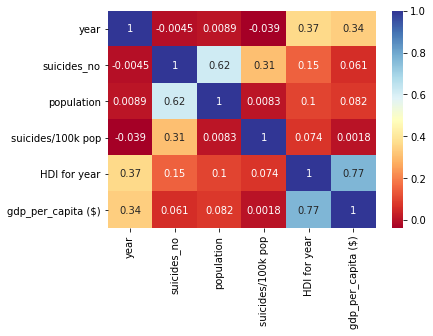

In [0]:
sn.heatmap(df.corr(),annot=True,cmap='RdYlBu')
plt.show()

In [0]:
#country year and HDI(null) are of no use
to_drop = df[['country-year','HDI for year']]
df = df.drop(to_drop,axis=1)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

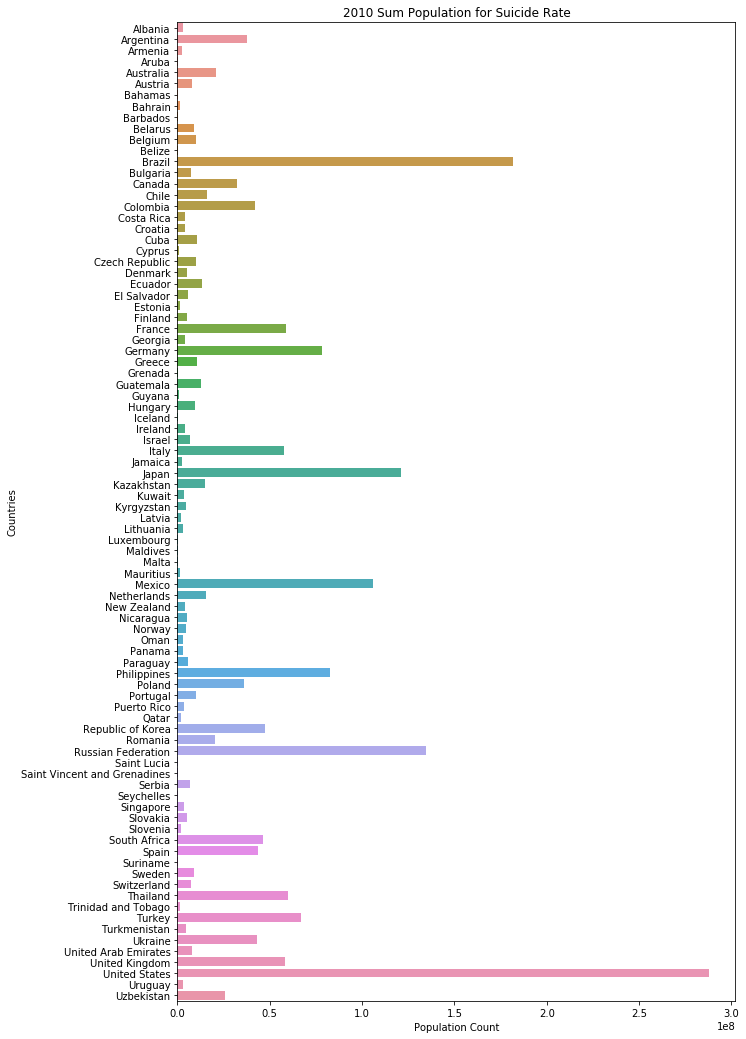

In [0]:
data_country=df[(df['year']==2010)]

country_2010_population=[]
country_2010=df[(df['year']==2010)].country.unique()

for country in country_2010:
    country_2010_population.append(sum(data_country[(data_country['country']==country)].population))    

#Now year 2010 find sum population every country

plt.figure(figsize=(10,18))
sn.barplot(y=country_2010,x=country_2010_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2010 Sum Population for Suicide Rate')
plt.show()

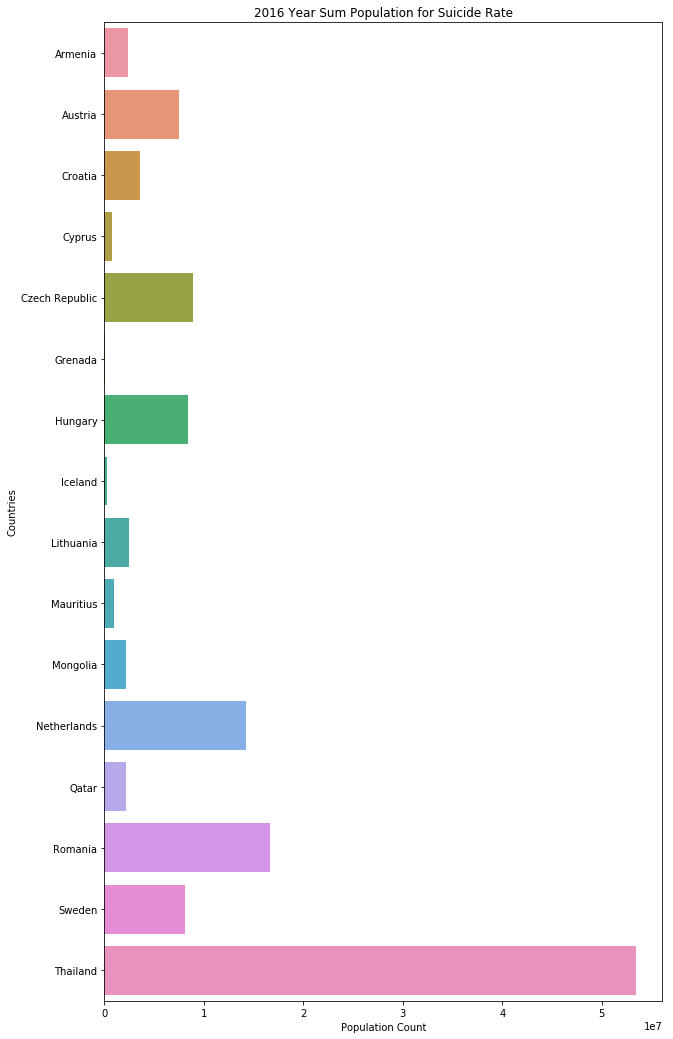

In [0]:
data_country=df[(df['year']==2016)]

country_2016_population=[]
country_2016=df[(df['year']==2016)].country.unique()

for country in country_2016:
    country_2016_population.append(sum(data_country[(data_country['country']==country)].population))    

#Now year 2016 find sum population every country

plt.figure(figsize=(10,18))
sn.barplot(y=country_2016,x=country_2016_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2016 Year Sum Population for Suicide Rate')
plt.show()

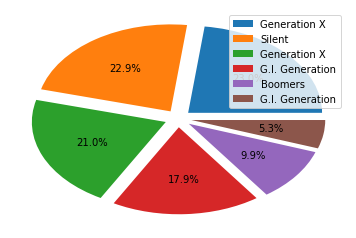

In [0]:
pie_chart = plt.pie(df.generation.value_counts(),explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%0.1f%%')
plt.legend(df.generation)
plt.show(pie_chart)


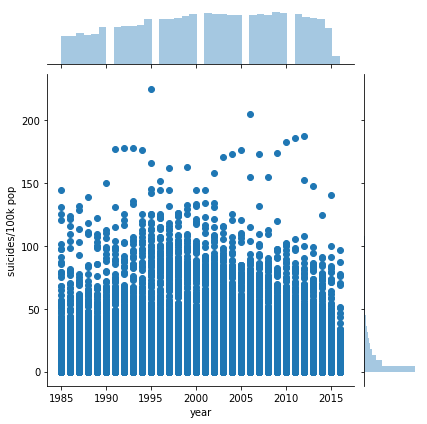

In [0]:
suicides = df['suicides/100k pop']
sn.jointplot(x=df.year,y=suicides,data=df)
plt.show()

In [0]:
df.sex.value_counts()

female    13910
male      13910
Name: sex, dtype: int64

<Figure size 720x1440 with 0 Axes>

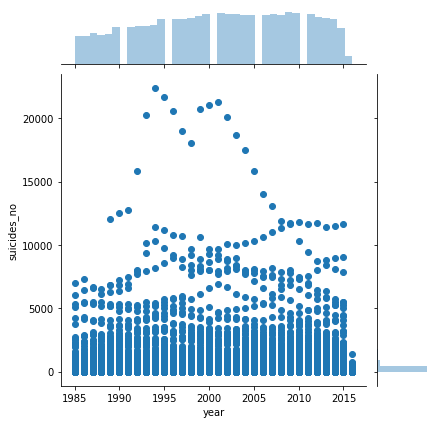

In [0]:
suicides = df['suicides_no']
year = df['year']
plt.figure(figsize=(10,20))
sn.jointplot(x=year,y=suicides,data=df)
plt.show()

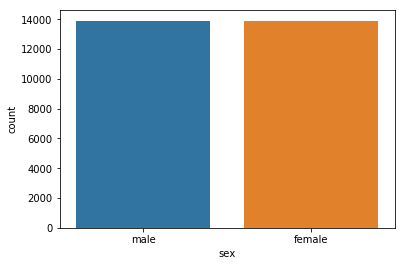

In [0]:
sn.countplot(df['sex'])
plt.show()

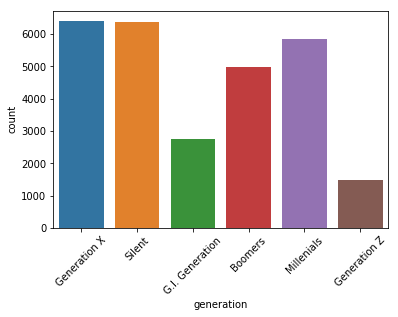

In [0]:
sn.countplot(df['generation'])
plt.xticks(rotation=45)
plt.show()

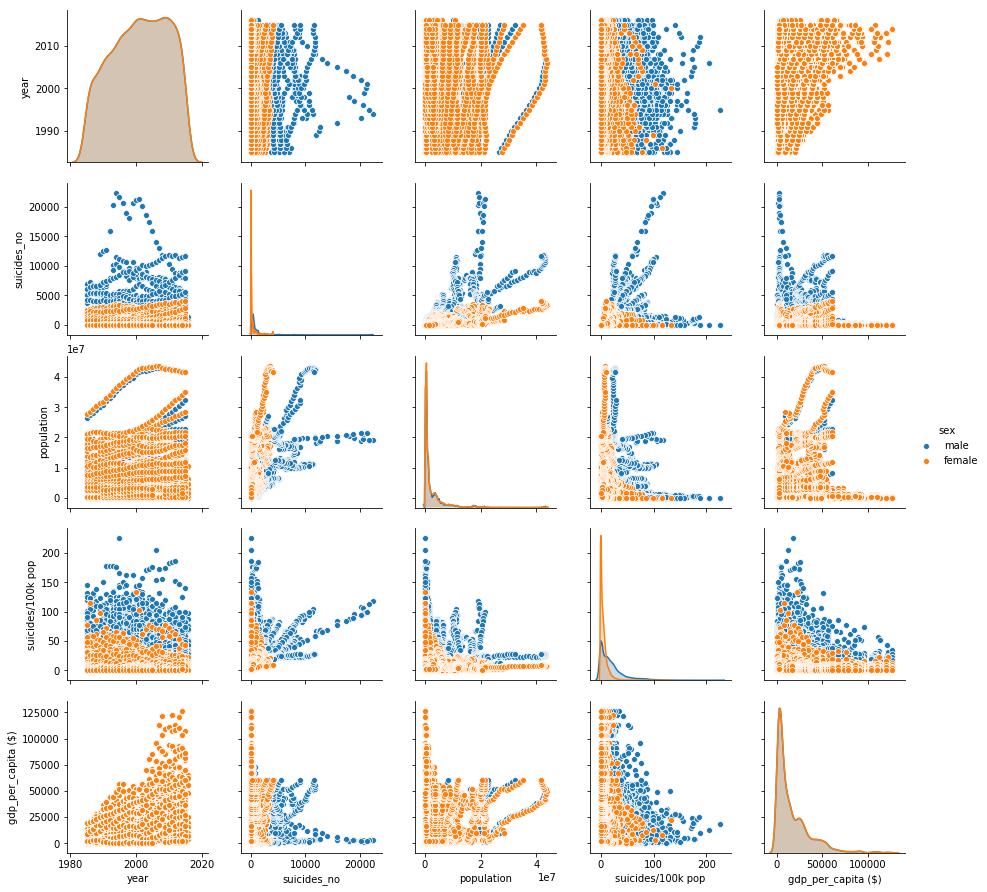

In [0]:
sn.pairplot(df,hue="sex")
plt.show()

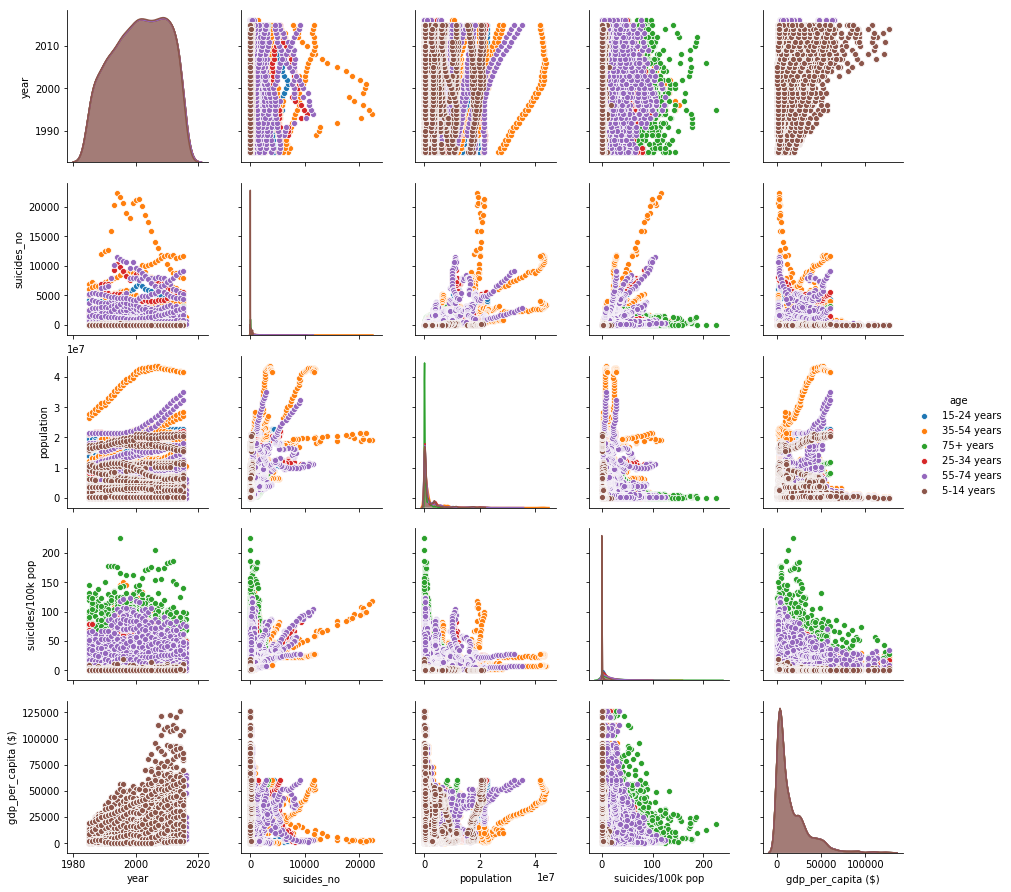

In [0]:
sn.pairplot(df,hue="age")
plt.show()

25-34 years    4642
55-74 years    4642
15-24 years    4642
75+ years      4642
35-54 years    4642
5-14 years     4610
Name: age, dtype: int64


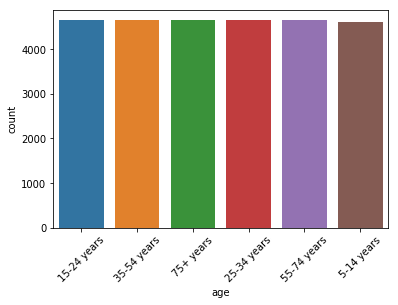

In [0]:
print(df.age.value_counts())
sn.countplot(df.age)
plt.xticks(rotation=45)
plt.show()